<a href="https://colab.research.google.com/github/jessikamorais/Metodos_Numericos/blob/main/M%C3%B3dulo_2_Exerc%C3%ADcio_10_ITEM_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RESOLUÇÃO DO ITEM 1.**

**Resolução do exercício 10_Artigo**: "*A Collection of 10 Numerical Problems in Chemical Engineering Solved by Various mathematical Software Packages*".

O problema consiste em um tanque agitado com aquecimento que opera de forma contínua e possui um contralador PI.

As equações para modelagem do sistema e controle são apresentadas a seguir:

____

$\frac{dT}{dt}=\frac{WC_p(T_i-T) + q}{\rho VC_{p}}$ ___ Equação A.40  
_____

$T_o(t) = t(T-\tau_d)$ ___ Equação A.41

____

$\frac{dT_o}{dt} = [T - T_o - (\frac{\tau _d}{2})(\frac{dT}{dt})] \frac{2}{\tau _d}$ ___Equação A.42
____

$\frac{dT_m}{dt}=\frac{T_o-T_m}{\tau_m}$ ___ Equação A.43

____

$q_{s}=WC_p(T_r - Tis)$ ___ Equação A.45

____

$\frac{d}{dT}(errsum)= T_r - T_m $ ___ Equação A.46

____

$q = Q_s + K_c(T_r - T-m) + \frac{K_c}{\tau _I}(errsum)$ ___ Equação A.47

____

**Item 1**. No primeiro item do exercício é pedido a resolução do problema sem o controle PI ($K_c=0 $) e a modificação da temperatura da corrente de entrada no tanque ($T_i$) modificada para 40°C decorridos 10 minutos do processo.
Requisita-se também a verificação da aproximação de Padé (Equação A.42) para o cálculo da tempetura $T_o$.





***Resposta***
Na roslução do exercício, primeiramente foram resolvidas utilizando o Método de Runge Kutta de 4ª ordem as equações diferenciais (Equações A.40, A.43 e A.46), com a aproximação de Padé (Equação A.43) para o cálculo de $T_o$ que também é uma equação diferencial.   
Em um segundo momento, foram resolvidas as mesmas equações diferenciais (Equações A.40, A.43 e A.46), porém, considerando a Equação A.41 para calcular o valor de $T_o$.  
Os cálculos para as temperaturas estão mais condizentes considerando a Equação A.42 (Aproximação de Padé) para o cálculo da Temperatura $T_o$. Nestes cálculos, os valores para as temperaturas $T$, $T_o$, $T_m$ estão mais próximos (análise do Gráfico 1).      
Utilizando a Equação A.41 as temperaturas apresentam grande divergência entre seus valores e o sistema não opera de forma satisfatória (análise do Gráfico 2).   
A aproximação de Padé se apresenta satisfatória para o cálculo de $T_o" até aproximadamente 80 minutos de funcionamento do processo (análise do Gráfico 3).   

In [1]:
# Importando as bibliotecas necessárias:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import odeint
from pylab import *

In [2]:
#Importando a pasta do github que será utilizada:
!git clone https://github.com/jessikamorais/Metodos_Numericos #clonar do Github
%cd Metodos_Numericos

Cloning into 'Metodos_Numericos'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 73 (delta 28), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/Metodos_Numericos


In [3]:
#Definindo as variáveis necessárias:

termo1 = 4000.0 #ro*V*Cp [kJ/°C]
Tis = 60 #Constante de tempo integral [°C]
TauD = 1 #Tempo morto, tempo que o sistema demora para atingir a T de Set point[min]
Kc = 40 #Ganho proporcional [kJ/min °C] #Condição para o Item 1
termo2 = 500 # W*Cp [kJ/min °C] 
Tr = 80 #[°C] #Temperatura do SetPoint
TauM = 5 #[min] #Constante de tempo do termopar
TauI = 2 #[min]
t_plot = []
T_plot = []
ToPade_plot = []
Tm_plot = []
ToReal_plot = []
TReal_plot = []
TmReal_plot = []
t_plot2 = []

#Tm = #Temperatura lida no termopar [°C]
#To = #Temperatura de saída do tanque ou temperatura que entra no termopar
#Ti = #Temperatura de entrada
#Tis = #Temperatura de projeto de estado estacionário

#Condição inicial do sistema (t= 0 min):
T0 = Tr
To0Pade = Tr
Tm0 = Tr
derrsum0 = 0.0
Ti = 60.0
T0Real = Tr
ToReal = Tr
Tm0Real = Tr
derrsum0Real = 0.0

**Etapa 1_ Resolvendo o sistema utilizando a aproximação de Padé:**

In [4]:
def model(Resp, t):

# Definindo o valor da temperatura de entrada no tanque (Ti) com relação ao tempo:
  if t < 10.0:
    Ti = 60.0
  elif t >= 10.0:
    Ti = 40.0
  
  # Definindo as equações utilizadas:
  T, ToPade, Tm, derrsum = Resp[0], Resp[1], Resp[2], Resp[3]
  T, ToPade, Tm, derrsum = Resp
  qs = termo2*(Tr-Ti) #Calor necessário para atingir o Set Point
  q = qs + Kc*(Tr-Tm) + (Kc/TauI)*derrsum #Calor que entra no tanque
  
  # Definindo as Equações Diferenciais utilizadas:
  dT  = (termo2/(Ti-T)+q)/(termo1)
  dToPade = ((T - ToPade) - (TauD/2)*(dT))/(2/TauD) #Calculo para o efeito do tempo morto (aproximação de Padé)
  dTm = ((ToPade - Tm)/TauM) #Modelagem do termopar
  derrsum = (Tr - Tm) #Nova variável para calcular a integral de q

  #Capturando os valores para a construção de gráficos:
  t_plot.append(t)
  T_plot.append(T)
  ToPade_plot.append(ToPade)
  Tm_plot.append(Tm)
 
  return [dT, dToPade, dTm, derrsum]

In [5]:
#Importando a função de Runge Kutta de ordem 4:
from rk4_sys import rk4

In [6]:
# Resolvendo pelo Método de Runge Kutta de ordem 4:

t0 = 0.0
x0 = [T0, To0Pade, Tm0, derrsum0] 
tf = 120.0

t, x = rk4( model, t0, tf,x0)



**Etapa 2_Resolvendo o sistema desconsiderando a aproximação de Padé:**

In [7]:
def modelReal(RespReal, t):

# Definindo o valor da temperatura de entrada no tanque (Ti) com relação ao tempo:
  if t < 10.0:
    Ti = 60.0
  elif t >= 10.0:
    Ti = 40.0
  
  # Definindo as equações utilizadas:
  TReal, TmReal, derrsumReal= RespReal[0], RespReal[1], RespReal[2]
  ToReal = TReal*(t - TauD) #Expressão para o tempo morto
  qs = termo2*(Tr-Ti) #Calor necessário para atingir o Set Point
  q = qs + Kc*(Tr-TmReal) + (Kc/TauI)*derrsumReal #Calor que entra no tanque
  
  # Definindo as Equações Diferenciais utilizadas:
  dTReal  = (termo2/(Ti-TReal)+q)/(termo1)
  dTmReal = ((ToReal - TmReal)/TauM) #Modelagem do termopar
  derrsumReal = (Tr - TmReal) #Nova variável para calcular a integral de q


  #Capturando os valores para a construção de gráficos:
  t_plot2.append(t)
  TReal_plot.append(TReal)
  TmReal_plot.append(TmReal)
  ToReal_plot.append(ToReal)

  return [dTReal, dTmReal, derrsumReal]

In [8]:
# Resolvendo pelo Método de Runge Kutta de ordem 4:

t0 = 0.0
x0 = [T0Real, Tm0Real, derrsum0Real] 
tf = 120.0

t, x = rk4( modelReal, t0, tf,x0)



**Plotando os gráficos das temperaturas $T$, $To$ e $T_m$ em função do tempo considerando a aproximação de Padé.** *Gráfico 1*   
   
     
       
         
          

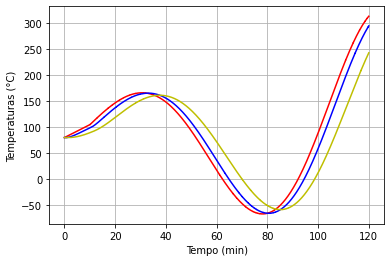

In [12]:
# Plotando o gráfico de temperaturas (T, ToReal, Tm) com relação ao tempo:
# Os gráficos são plotados consideração a aproximação de Padé para To:

figure()
plot(t_plot, T_plot,'-r',t_plot, ToPade_plot,'-b',t_plot, Tm_plot,'-y')
ylabel('Temperaturas (°C)')
xlabel('Tempo (min)')
grid()

**Plotando os gráficos das temperaturas  T ,  To  e  Tm  em função do tempo não considerando a aproximação de Padé.** *Gráfico 2*         
   
      
         
            
              

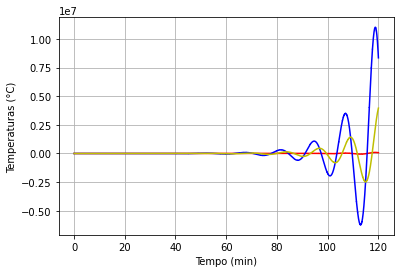

In [13]:
# Plotando o gráfico de temperaturas (T, ToReal, Tm) com relação ao tempo:
# Os gráficos são plotados consideração a aproximação de Padé para To:

figure()
plot(t_plot2, TReal_plot,'-r',t_plot2, ToReal_plot,'-b',t_plot2, TmReal_plot,'-y')
ylabel('Temperaturas (°C)')
xlabel('Tempo (min)')
grid()

**Plotando o gráfico de comparação entre $T_o$ calculado pela aproxição de Padé ($T_oPade$) e $T_o$ calculado sem a aproximação ($T_oReal$).** *Gráfico 3*

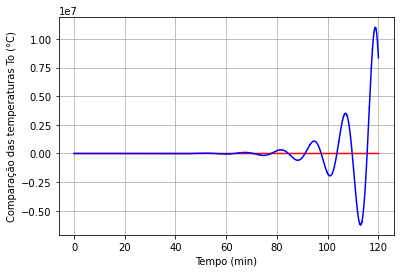

In [11]:
# Plotando o gráfico de comparação entre To calculado pela aproximação de Padé To (ToPade) e To calculado sem a aproximação (ToReal):

figure()
plot(t_plot, ToPade_plot,'-r')
plot(t_plot2, ToReal_plot,'-b')
ylabel('Comparação das temperaturas To (°C)')
xlabel('Tempo (min)')
grid()